All CSV files loaded successfully!

--- Circuits Data (First 5 Rows) ---
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  

<ipython-input-1-3ac6e47e48a6>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driver_wins.index, y=driver_wins.values, palette='viridis')


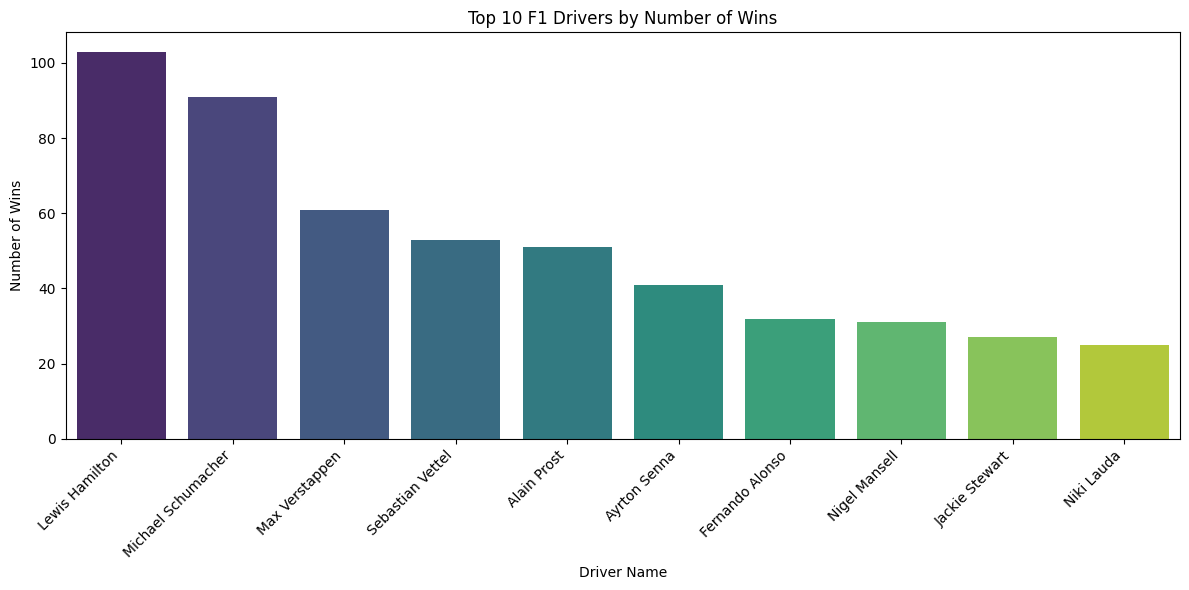


--- Average Finishing Position per Driver (Sorted) ---

driver_name
George Amick       2.000000
Dorino Serafini    2.000000
Lee Wallard        3.500000
Luigi Fagioli      4.375000
Juan Fangio        4.793103
Lewis Hamilton     4.962099
Joie Chitwood      5.000000
Oscar Gálvez       5.000000
Eric Thompson      5.000000
Max Verstappen     5.775510
Name: positionOrder, dtype: float64


<ipython-input-1-3ac6e47e48a6>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_finish_position_driver.index, y=avg_finish_position_driver.values, palette='coolwarm')


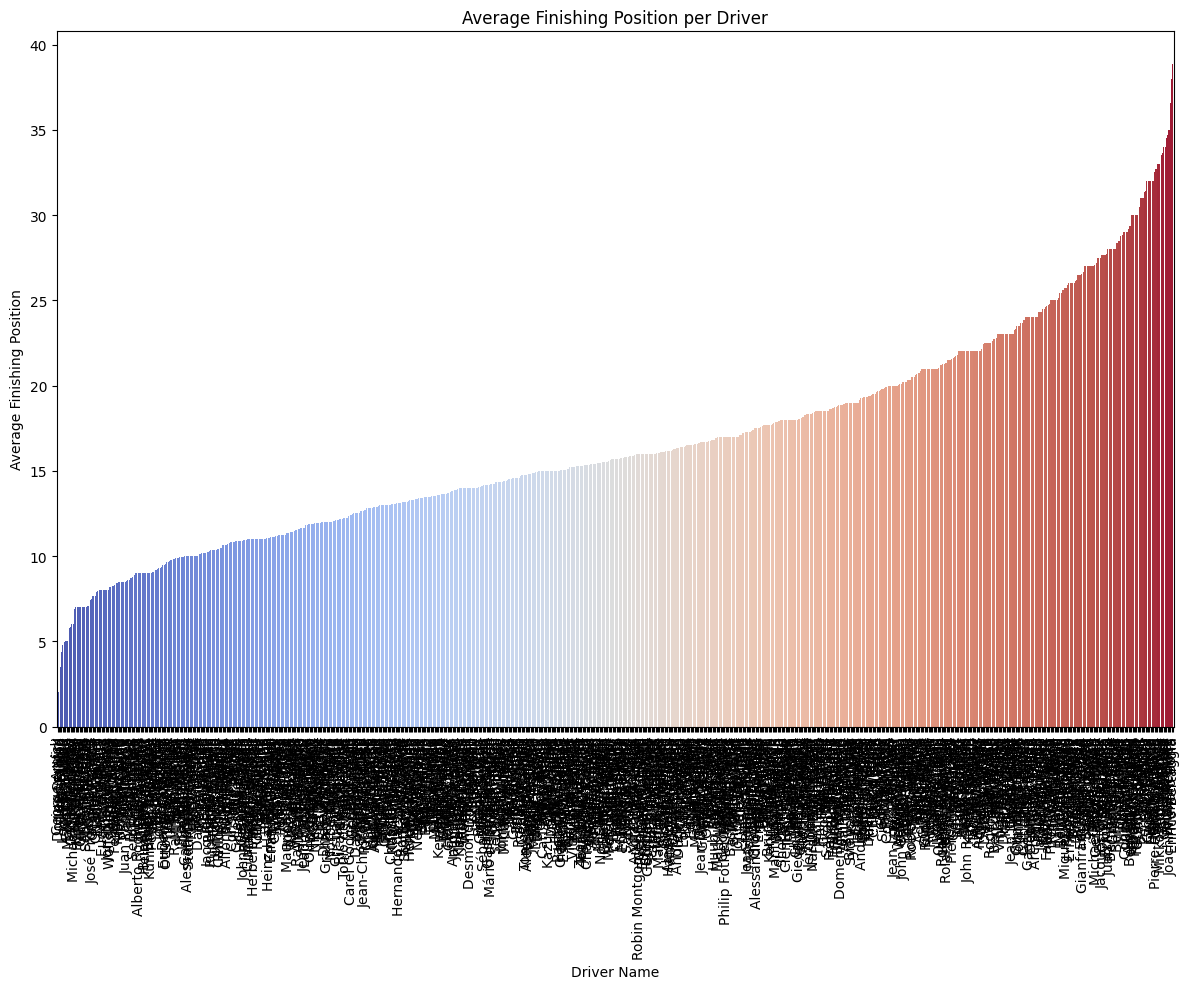


--- Top 10 Constructors by Wins ---

constructor_name
Ferrari       246
McLaren       180
Mercedes      126
Red Bull      120
Williams      114
Team Lotus     45
Renault        35
Benetton       27
Brabham        23
Tyrrell        23
Name: count, dtype: int64


<ipython-input-1-3ac6e47e48a6>:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=constructor_wins.index, y=constructor_wins.values, palette='magma')


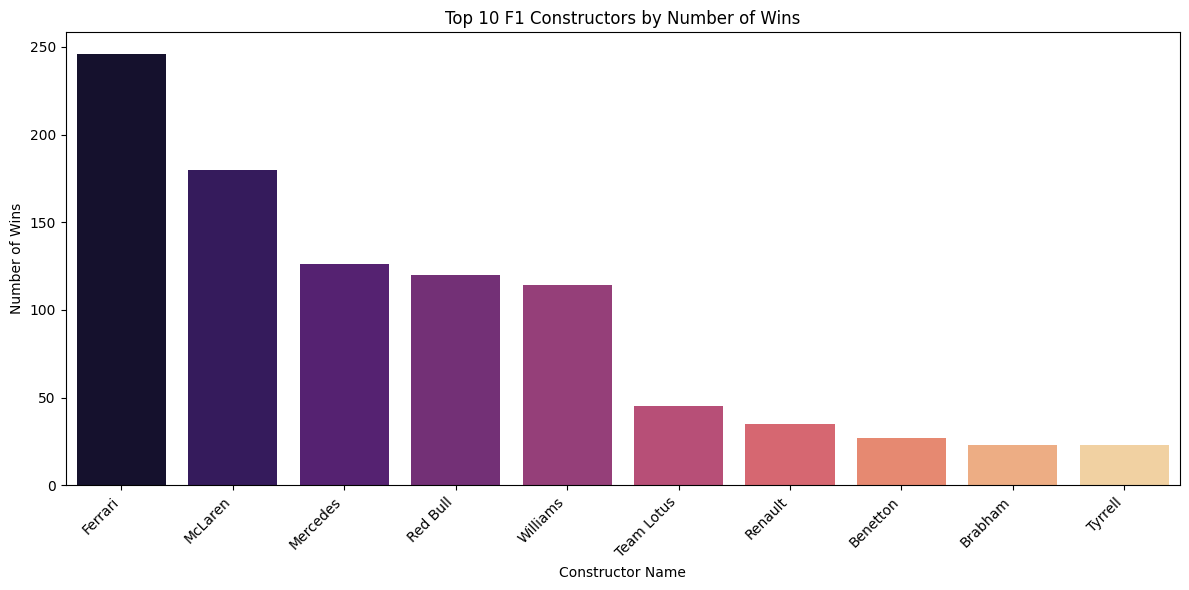


--- Top 10 Drivers by Podium Finishes ---

driver_name
Lewis Hamilton        198
Michael Schumacher    155
Sebastian Vettel      122
Fernando Alonso       106
Alain Prost           106
Max Verstappen        106
Kimi Räikkönen        103
Ayrton Senna           80
Rubens Barrichello     68
Valtteri Bottas        67
Name: count, dtype: int64


<ipython-input-1-3ac6e47e48a6>:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=driver_podiums.index, y=driver_podiums.values, palette='viridis')


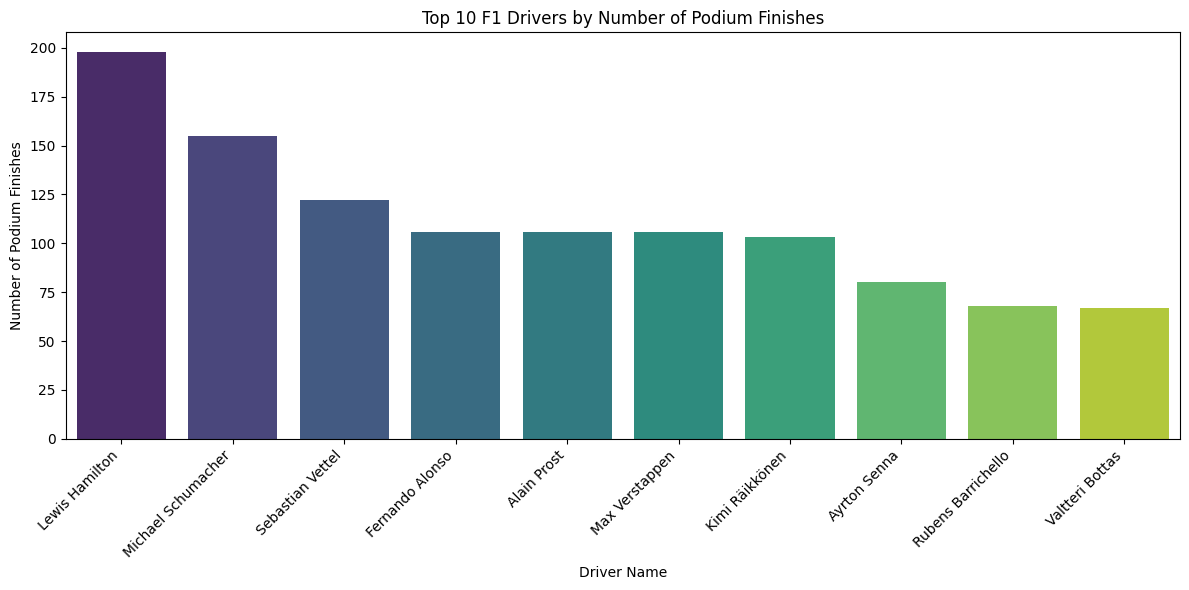


Average finishing position for Lewis Hamilton: 4.96

Top 10 Constructors by Wins:
constructor_name
Ferrari       246
McLaren       180
Mercedes      126
Red Bull      120
Williams      114
Team Lotus     45
Renault        35
Benetton       27
Brabham        23
Tyrrell        23
Name: count, dtype: int64


<ipython-input-1-3ac6e47e48a6>:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=constructor_wins.index, y=constructor_wins.values, palette='magma')


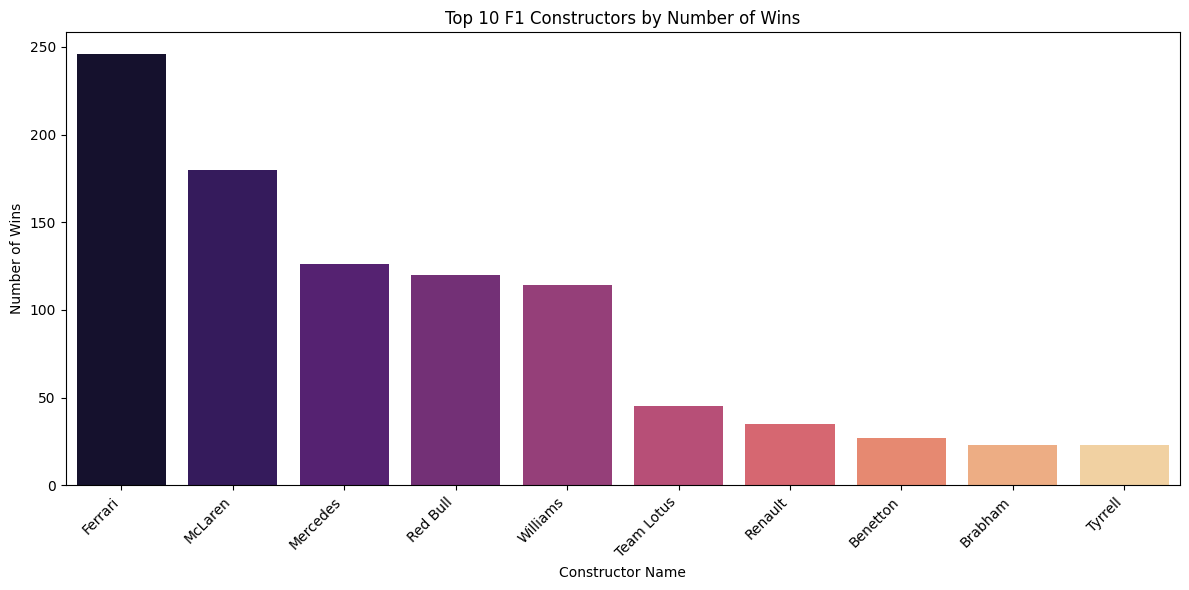

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading
try:
    df_circuits = pd.read_csv('circuits.csv')
    df_drivers = pd.read_csv('drivers.csv')
    df_constructors = pd.read_csv('constructors.csv')
    df_races = pd.read_csv('races.csv')
    df_results = pd.read_csv('results.csv.zip')  # It was a zip file thus .zip
    print("All CSV files loaded successfully!")
except FileNotFoundError as e:
    print(f"Error loading a file: {e}")
    exit()
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()

# 2. Data Exploration (Basic - you can add more as needed)
print("\n--- Circuits Data (First 5 Rows) ---")
print(df_circuits.head())
print("\n--- Drivers Data (First 5 Rows) ---")
print(df_drivers.head())
print("\n--- Constructors Data (First 5 Rows) ---")
print(df_constructors.head())
print("\n--- Races Data (First 5 Rows) ---")
print(df_races.head())
print("\n--- Results Data (First 5 Rows) ---")
print(df_results.head())

# 3. Data Merging
# Merge results with drivers
df_merged_results = pd.merge(df_results, df_drivers[['driverId', 'forename', 'surname']], on='driverId', how='left')
df_merged_results['driver_name'] = df_merged_results['forename'] + ' ' + df_merged_results['surname']
df_merged_results.drop(['forename', 'surname'], axis=1, inplace=True)

# Merge with constructors
df_merged_results = pd.merge(df_merged_results, df_constructors[['constructorId', 'name']], on='constructorId', how='left', suffixes=('', '_constructor'))
df_merged_results.rename(columns={'name': 'constructor_name'}, inplace=True) #changed

# Merge with races and circuits
df_merged_results = pd.merge(df_merged_results, df_races[['raceId', 'circuitId', 'year']], on='raceId', how='left')
df_merged_results = pd.merge(df_merged_results, df_circuits[['circuitId', 'name', 'location', 'country']], on='circuitId', how='left', suffixes=('', '_circuit'))
df_merged_results.rename(columns={'name_circuit': 'circuit_name', 'location_circuit': 'circuit_location', 'country_circuit': 'circuit_country'}, inplace=True)

print("\n--- Merged Data (First 5 Rows) ---")
print(df_merged_results.head())
print("\n--- Merged Data Info ---")
print(df_merged_results.info())


# 4. Data Analysis and Visualization

# 4.1  Calculate and Visualize Wins per Driver
def calculate_driver_wins(df):
    """
    Calculates and visualizes the top 10 drivers by wins.

    Args:
        df (pd.DataFrame): The merged DataFrame containing race results.

    Returns:
        pd.Series: A Series containing the top 10 drivers and their win counts.
    """
    driver_wins = df[df['positionOrder'] == 1]['driver_name'].value_counts().nlargest(10)
    print("\n--- Top 10 Drivers by Wins ---\n")
    print(driver_wins)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=driver_wins.index, y=driver_wins.values, palette='viridis')
    plt.xlabel("Driver Name")
    plt.ylabel("Number of Wins")
    plt.title("Top 10 F1 Drivers by Number of Wins")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return driver_wins

driver_wins = calculate_driver_wins(df_merged_results)


# 4.2 Calculate and Visualize Average Finishing Position per Driver
def calculate_avg_finishing_position(df):
    """
    Calculates and visualizes the average finishing position for each driver.

    Args:
        df (pd.DataFrame): The merged DataFrame containing race results.

    Returns:
        pd.Series: A Series containing the average finishing position for each driver, sorted in ascending order (best average first).
    """
    avg_finish_position_driver = df.groupby('driver_name')['positionOrder'].mean().sort_values()
    print("\n--- Average Finishing Position per Driver (Sorted) ---\n")
    print(avg_finish_position_driver.head(10))  # Show top 10 drivers

    plt.figure(figsize=(12, 10))
    sns.barplot(x=avg_finish_position_driver.index, y=avg_finish_position_driver.values, palette='coolwarm')
    plt.xlabel("Driver Name")
    plt.ylabel("Average Finishing Position")
    plt.title("Average Finishing Position per Driver")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    return avg_finish_position_driver

avg_finish_position_driver = calculate_avg_finishing_position(df_merged_results)


# 4.3  Calculate and Visualize Wins per Constructor
def calculate_constructor_wins(df):
    """
    Calculates and visualizes the top 10 constructors by wins.

    Args:
        df (pd.DataFrame): The merged DataFrame containing race results.

    Returns:
        pd.Series: A Series containing the top 10 constructors and their win counts.
    """
    constructor_wins = df[df['positionOrder'] == 1]['constructor_name'].value_counts().nlargest(10)
    print("\n--- Top 10 Constructors by Wins ---\n")
    print(constructor_wins)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=constructor_wins.index, y=constructor_wins.values, palette='magma')
    plt.xlabel("Constructor Name")
    plt.ylabel("Number of Wins")
    plt.title("Top 10 F1 Constructors by Number of Wins")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return constructor_wins

constructor_wins = calculate_constructor_wins(df_merged_results)


# 4.4 Calculate Podium Finishes (1st, 2nd, 3rd)
def calculate_podium_finishes(df):
    """
    Calculates the number of podium finishes (1st, 2nd, and 3rd place) for each driver.

    Args:
        df (pd.DataFrame):  The merged DataFrame containing race results.

    Returns:
         pd.Series: A Series containing the number of podium finishes for each driver.
    """
    driver_podiums = df[df['positionOrder'].isin([1, 2, 3])]['driver_name'].value_counts().nlargest(10)
    print("\n--- Top 10 Drivers by Podium Finishes ---\n")
    print(driver_podiums)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=driver_podiums.index, y=driver_podiums.values, palette='viridis')
    plt.xlabel("Driver Name")
    plt.ylabel("Number of Podium Finishes")
    plt.title("Top 10 F1 Drivers by Number of Podium Finishes")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return driver_podiums

driver_podiums = calculate_podium_finishes(df_merged_results)


# 4.5 Calculate Average Finishing Position for a Specific Driver
def calculate_average_finishing_position_for_driver(df, driver_name):
    """
    Calculates the average finishing position for a specified driver.

    Args:
        df (pd.DataFrame): The merged DataFrame.
        driver_name (str): The name of the driver to analyze.

    Returns:
        float: The average finishing position for the specified driver, or None if the driver is not found.
    """
    driver_data = df[df['driver_name'] == driver_name]
    if not driver_data.empty:
        average_finish_position = driver_data['positionOrder'].mean()
        print(f"\nAverage finishing position for {driver_name}: {average_finish_position:.2f}")
        return average_finish_position
    else:
        print(f"\nDriver {driver_name} not found in the data.")
        return None

target_driver_name = 'Lewis Hamilton'  # Replace with the driver you want to analyze
calculate_average_finishing_position_for_driver(df_merged_results, target_driver_name)


# 4.6  Calculate Wins per Constructor
def calculate_constructor_wins(df):
    """
    Calculates the number of wins for each constructor.

    Args:
        df (pd.DataFrame): The merged DataFrame containing race results.

    Returns:
        pd.Series: A Series containing the number of wins for each constructor.
    """
    constructor_wins = df[df['positionOrder'] == 1]['constructor_name'].value_counts().nlargest(10)
    print("\nTop 10 Constructors by Wins:")
    print(constructor_wins)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=constructor_wins.index, y=constructor_wins.values, palette='magma')
    plt.xlabel("Constructor Name")
    plt.ylabel("Number of Wins")
    plt.title("Top 10 F1 Constructors by Number of Wins")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return constructor_wins

constructor_wins = calculate_constructor_wins(df_merged_results)
